In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression

# Entrenamiemto del modelo

In [240]:
df = pd.read_csv('data/training_data.csv')

In [241]:
df.head()

,player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Passes-Att (GK),Passes-Thr,Passes-AvgLen,Goal Kicks-Att,Goal Kicks-AvgLen,Crosses-Opp,Crosses-Stp,Sweeper-#OPA,Sweeper-AvgDist,rating
0,Alexandre Lacazette,9.00,fr FRA,FW,26-075,90,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.23
1,Danny Welbeck,23.00,eng ENG,AM,26-258,74,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.85
2,Theo Walcott,14.00,eng ENG,RW,28-148,16,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28
3,Mesut Özil,11.00,de GER,AM,28-300,90,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Granit Xhaka,29.00,ch SUI,CM,24-318,90,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.74


In [242]:
df.dropna(subset=['rating'], inplace=True)
df.head()

,player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Passes-Att (GK),Passes-Thr,Passes-AvgLen,Goal Kicks-Att,Goal Kicks-AvgLen,Crosses-Opp,Crosses-Stp,Sweeper-#OPA,Sweeper-AvgDist,rating
0,Alexandre Lacazette,9.00,fr FRA,FW,26-075,90,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.23
1,Danny Welbeck,23.00,eng ENG,AM,26-258,74,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.85
2,Theo Walcott,14.00,eng ENG,RW,28-148,16,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28
4,Granit Xhaka,29.00,ch SUI,CM,24-318,90,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.74
5,Mohamed Elneny,35.00,eg EGY,CM,25-031,66,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.45


In [243]:
df.Pos.unique()

array(['FW', 'AM', 'RW', 'CM', 'DM', 'WB', 'CB', 'LM', 'RM', 'LB', 'RB',
       'GK', 'LW'], dtype=object)

Voy a agrupar las posiciones similares

In [244]:
df['Pos'].replace({'RW': 'W',
                   'LW': 'W',
                   'LM': 'M',
                   'RM': 'M',
                   'LB': 'FB',
                   'RB': 'FB',
                   }, inplace=True)

C:\Users\nazar\AppData\Local\Temp\ipykernel_6016\3551475685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pos'].replace({'RW': 'W',


In [245]:
X = df.drop(['rating', 'player', '#', 'Nation', 'Age', 'team', 'match'], axis=1)
y = df['rating']

In [246]:
X.fillna(0, inplace=True)

In [247]:
X.head()

,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,xG,npxG,...,Launched-Att,Passes-Att (GK),Passes-Thr,Passes-AvgLen,Goal Kicks-Att,Goal Kicks-AvgLen,Crosses-Opp,Crosses-Stp,Sweeper-#OPA,Sweeper-AvgDist
0,FW,90,1,0,0,0,3,2,0.30,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,AM,74,1,0,0,0,3,1,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,W,16,0,0,0,0,0,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,CM,90,0,2,0,0,4,1,0.10,0.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,CM,66,0,1,0,0,1,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [249]:
X = pd.get_dummies(X, columns=['Pos'], dtype=int)

X.head()

,Min,Gls,Ast,PK,PKatt,Sh,SoT,xG,npxG,SCA,...,Pos_AM,Pos_CB,Pos_CM,Pos_DM,Pos_FB,Pos_FW,Pos_GK,Pos_M,Pos_W,Pos_WB
0,90,1,0,0,0,3,2,0.30,0.30,6,...,0,0,0,0,0,1,0,0,0,0
1,74,1,0,0,0,3,1,1.00,1.00,4,...,1,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0.00,0.00,1,...,0,0,0,0,0,0,0,0,1,0
4,90,0,2,0,0,4,1,0.10,0.10,12,...,0,0,1,0,0,0,0,0,0,0
5,66,0,1,0,0,1,0,0.00,0.00,3,...,0,0,1,0,0,0,0,0,0,0


In [251]:
lr = LinearRegression()

lr.fit(X, y)

LinearRegression()

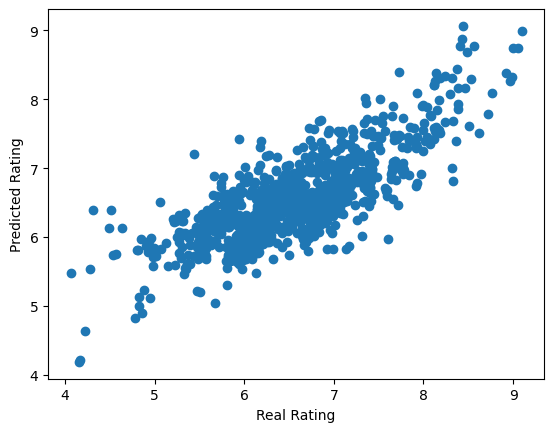

In [252]:
plt.scatter(y, lr.predict(X))
plt.xlabel('Real Rating')
plt.ylabel('Predicted Rating')
plt.show()

## Prediccion

Voy a usar el modelo para puntear a los jugadores del partido Belgrano - Boca

In [253]:
url = "https://fbref.com/en/partidos/b7c78896/Belgrano-Boca-Juniors-Septiembre-28-2024-Liga-Profesional-Argentina"

dfs = pd.read_html(url)

Tengo que hacerle todo el preprocesado, esto iria en una pipeline.

In [254]:
def limpiar_tabla(tabla, nombre_tabla, match):
    # standard
    if nombre_tabla == 'home_standard':
        to_keep_as_is = ['Unnamed', 'Performance', 'Expected', 'SCA', 'Carries']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla = tabla.iloc[:, :-8]
        tabla.drop(columns=['Touches', 'Blocks', 'Int', 'Tkl', 'CrdY', 'CrdR', 'xAG'], inplace=True)
    elif nombre_tabla == 'away_standard':
        to_keep_as_is = ['Unnamed', 'Performance', 'Expected', 'SCA', 'Carries']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla = tabla.iloc[:, :-8]
        tabla.drop(columns=['Touches', 'Blocks', 'Int', 'Tkl', 'CrdY', 'CrdR', 'xAG'], inplace=True)
    # pass
    elif nombre_tabla == 'home_pass':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Total-Cmp', 'Total-Att', 'Total-Cmp%', 'Short-Cmp%', 'Medium-Cmp%', 'Long-Cmp%'], inplace=True)
    elif nombre_tabla == 'away_pass':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Total-Cmp', 'Total-Att', 'Total-Cmp%', 'Short-Cmp%', 'Medium-Cmp%', 'Long-Cmp%'], inplace=True)
    # pass types
    elif nombre_tabla == 'home_pass_types':
        to_keep_as_is = ['Unnamed', 'Pass Types', 'Corner Kicks', 'Outcomes']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], inplace=True)
    elif nombre_tabla == 'away_pass_types':
        to_keep_as_is = ['Unnamed', 'Pass Types', 'Corner Kicks', 'Outcomes']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], inplace=True)
    # defense
    elif nombre_tabla == 'home_defense':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Tackles-Def 3rd', 'Tackles-Mid 3rd', 'Tackles-Att 3rd', 'Challenges-Tkl%', 'Tkl+Int'], inplace=True)
    elif nombre_tabla == 'away_defense':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Tackles-Def 3rd', 'Tackles-Mid 3rd', 'Tackles-Att 3rd', 'Challenges-Tkl%', 'Tkl+Int'], inplace=True)
    # possession
    elif nombre_tabla == 'home_possession':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Touches-Touches', 'Touches-Live', 'Take-Ons-Succ%', 'Take-Ons-Tkld', 'Take-Ons-Tkld%'], inplace=True)
    elif nombre_tabla == 'away_possession':
        to_keep_as_is = ['Unnamed']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Touches-Touches', 'Touches-Live', 'Take-Ons-Succ%', 'Take-Ons-Tkld', 'Take-Ons-Tkld%'], inplace=True)
    # misc
    elif nombre_tabla == 'home_misc':
        to_keep_as_is = ['Unnamed', 'Performance']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Crs', 'Int', 'TklW', 'Aerial Duels-Won%'], inplace=True)
    elif nombre_tabla == 'away_misc':
        to_keep_as_is = ['Unnamed', 'Performance']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Crs', 'Int', 'TklW', 'Aerial Duels-Won%'], inplace=True)
    # gk
    elif nombre_tabla == 'home_gk':
        to_keep_as_is = ['Unnamed', 'Shot Stopping']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Save%', 'Launched-Cmp%', 'Passes-Launch%', 'Goal Kicks-Launch%', 'Crosses-Stp%'], inplace=True)
    elif nombre_tabla == 'away_gk':
        to_keep_as_is = ['Unnamed', 'Shot Stopping']
        tabla.columns = ['{}-{}'.format(c[0], c[1]) if all(x not in c[0] for x in to_keep_as_is) else c[1] for c in tabla.columns]
        tabla.drop(columns=['Save%', 'Launched-Cmp%', 'Passes-Launch%', 'Goal Kicks-Launch%', 'Crosses-Stp%'], inplace=True)
    
    if 'home' in nombre_tabla:
        tabla['team'] = match.split(' - ')[0]
    else:
        tabla['team'] = match.split(' - ')[1]

    if nombre_tabla != 'home_gk' and nombre_tabla != 'away_gk':
        tabla.drop(tabla.index[-1], inplace=True)
    
    return tabla

In [255]:
tablas_clean = []

nombres_tablas = ['home_standard', 'home_pass', 'home_pass_types', 'home_defense', 'home_possession', 'home_misc', 'home_gk',
                'away_standard', 'away_pass', 'away_pass_types', 'away_defense', 'away_possession', 'away_misc', 'away_gk']

for tabla, nombre_tabla in zip(dfs[3:17], nombres_tablas):
    tabla = limpiar_tabla(tabla, nombre_tabla, 'Belgrano - Boca')
    tablas_clean.append(tabla)

In [256]:
def primera_posicion(pos_str):
    if pd.isna(pos_str):
        return np.nan  # Devolver NaN si el valor es NaN
    # Tomar la primera posición
    return pos_str.split(',')[0]

for df in tablas_clean:
    try:
        df['Pos'] = df['Pos'].apply(primera_posicion)
    except:
        pass

In [257]:
from functools import reduce

def merge_and_concat(tablas_clean, group_size=7):
    merged_dfs = []
    for i in range(0, len(tablas_clean), group_size):
        group = tablas_clean[i:i + group_size]
        df_merged = reduce(
            lambda left, right: pd.merge(left, right, how='left', on=['Player', 'Nation', 'Age', 'team'], suffixes=('', '_dup')),
            group
        )
        
        df_merged = df_merged.loc[:, ~df_merged.columns.str.endswith('_dup')]
        
        merged_dfs.append(df_merged)
    
    df_final = pd.concat(merged_dfs, ignore_index=True)
    
    return df_final

df_ = merge_and_concat(tablas_clean, group_size=7)
df_.head()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Launched-Att,Passes-Att (GK),Passes-Thr,Passes-AvgLen,Goal Kicks-Att,Goal Kicks-AvgLen,Crosses-Opp,Crosses-Stp,Sweeper-#OPA,Sweeper-AvgDist
0,Franco Jara,29.00,ar ARG,FW,36-075,73,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mariano Troilo,37.00,ar ARG,CB,21-098,17,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nicolás Fernández,22.00,ar ARG,FW,28-233,80,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pablo Chavarría,19.00,ar ARG,FW,36-270,10,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Esteban Rolón,16.00,ar ARG,AM,29-187,63,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df_['Pos'] = df_['Pos'].replace({'RW': 'W',
                   'LW': 'W',
                   'LM': 'M',
                   'RM': 'M',
                   'LB': 'FB',
                   'RB': 'FB',
                   })

df_.head()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Launched-Att,Passes-Att (GK),Passes-Thr,Passes-AvgLen,Goal Kicks-Att,Goal Kicks-AvgLen,Crosses-Opp,Crosses-Stp,Sweeper-#OPA,Sweeper-AvgDist
0,Franco Jara,29.00,ar ARG,FW,36-075,73,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mariano Troilo,37.00,ar ARG,CB,21-098,17,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nicolás Fernández,22.00,ar ARG,FW,28-233,80,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pablo Chavarría,19.00,ar ARG,FW,36-270,10,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Esteban Rolón,16.00,ar ARG,AM,29-187,63,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
X_test = df_.copy()

In [260]:
X_test.drop(columns=['Player', '#', 'Nation', 'team', 'Age'], inplace=True)

In [261]:
X_test.fillna(0, inplace=True)

In [262]:
X_test = pd.get_dummies(X_test, columns=['Pos'], dtype=int)

Hay categorias que faltan, para arreglarlo habria que usar la clase OneHotEncoder de sklearn que te permite pasar las categorias.

In [264]:
X_test['Pos_W'] = 0
X_test['Pos_WB'] = 0
X_test['Pos_DM'] = 0

In [265]:
X_test = X_test[X.columns.to_list()]

In [267]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_['Predicted Rating'] = lr.predict(X_test)

df_[['Player', 'Predicted Rating']].sort_values('Predicted Rating', ascending=False)

,Player,Predicted Rating
30,Leandro Brey,7.31
0,Franco Jara,7.31
2,Nicolás Fernández,7.06
14,Gabriel Compagnucci,6.90
13,Anibal Leguizamón,6.76
15,Juan Espínola,6.71
9,Francisco González,6.62
22,Tomás Belmonte,6.56
27,Aaron Anselmino,6.54
20,Milton Delgado,6.53
